# Final Model - Logistic Regression

## Setup

In [16]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, roc_auc_score, make_scorer, classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import eli5
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [4]:
df = pd.read_csv("../data/df_final.csv")

In [5]:
#get features and target
X = df.drop("is_child", axis=1)
y = df["is_child"]

In [6]:
#make pipeline
pipe = Pipeline([
    ("smote", SMOTE(random_state=42, k_neighbors=3, sampling_strategy="auto")),
    ("clf", LogisticRegression(random_state=42, C=0.016681005372000592, max_iter=2000, penalty="l2", solver="saga"))
])

#set scoring metrics
scoring = {
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score),
    "roc_auc": make_scorer(roc_auc_score)
}

In [7]:
#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
#fit model
pipe.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(k_neighbors=3, random_state=42)),
                ('clf',
                 LogisticRegression(C=0.016681005372000592, max_iter=2000,
                                    random_state=42, solver='saga'))])

In [9]:
#get predictions and probabilities
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]

In [10]:
#get final results for evaluation
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

In [11]:
#print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[365751  97651]
 [  5883  19791]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88    463402
           1       0.17      0.77      0.28     25674

    accuracy                           0.79    489076
   macro avg       0.58      0.78      0.58    489076
weighted avg       0.94      0.79      0.84    489076



In [12]:
#print final results
print("Summary of Results:")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

Summary of Results:
Recall: 0.7709
F1-Score: 0.2766
ROC-AUC: 0.8600


In [13]:
#view feature importance
eli5.show_weights(pipe.named_steps["clf"], feature_names=[str(col) for col in X.columns])

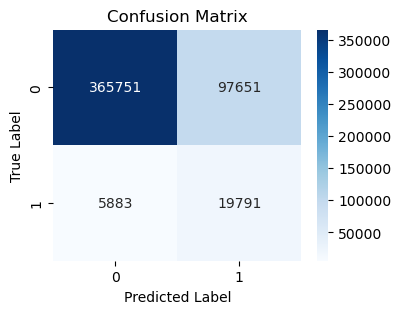

In [14]:
#make heatmap of confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

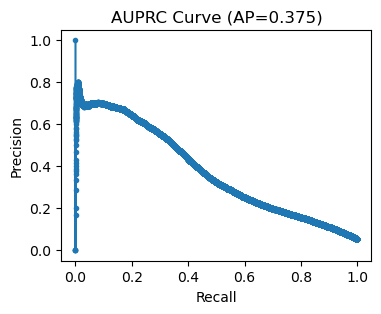

In [15]:
#make auprc curve
y_scores = pipe.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(4, 3))
plt.plot(recall, precision, marker=".")
plt.title(f"AUPRC Curve (AP={average_precision_score(y_test, y_scores):.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()